In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()

data = open('/content/ba2.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'في': 1, 'من': 2, 'على': 3, 'أن': 4, 'ما': 5, '1': 6, 'السراج': 7, 'ابن': 8, 'لا': 9, 'إلى': 10, 'كتاب': 11, 'أو': 12, '2': 13, '3': 14, 'الأصول': 15, 'كان': 16, 'هذا': 17, 'نحو': 18, 'الفعل': 19, 'ولا': 20, 'الاسم': 21, 'التي': 22, 'لم': 23, 'الذي': 24, 'ب': 25, 'بن': 26, 'عن': 27, '4': 28, 'الكتاب': 29, 'النحو': 30, 'كما': 31, 'هو': 32, 'ذلك': 33, 'هذه': 34, 'انظر': 35, 'تقول': 36, 'فيه': 37, 'زيد': 38, 'قولك': 39, '5': 40, 'فقد': 41, 'وقد': 42, 'إن': 43, 'له': 44, 'أنه': 45, 'عليه': 46, 'ولم': 47, 'إذا': 48, 'وهو': 49, 'الأفعال': 50, 'ذكر': 51, 'وما': 52, 'لأن': 53, 'الأسماء': 54, 'قد': 55, 'اسم': 56, 'كتب': 57, '18': 58, 'الله': 59, 'وهي': 60, 'الأدباء': 61, 'قلت': 62, 'عنه': 63, 'سيبويه': 64, 'معجم': 65, 'كل': 66, 'كانت': 67, 'إليه': 68, 'بعد': 69, 'لابن': 70, 'مع': 71, 'وأما': 72, 'سنة': 73, 'غير': 74, 'يكون': 75, 'الأصل': 76, 'قال': 77, '6': 78, 'منها': 79, 'به': 80, 'شرح': 81, 'الإعراب': 82, 'الفاعل': 83, 'مثل': 84, 'أبو': 85, 'بكر': 86, 'إلا': 87, 'وإنما': 88, 'فإن': 89, 'نسخ

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
print(tokenizer.word_index['سمع']) # مافهمت وش المقصد 
print(tokenizer.word_index['بد'])
print(tokenizer.word_index['حرفا'])
print(tokenizer.word_index['خلافه'])
print(tokenizer.word_index['فمتى'])
print(tokenizer.word_index['لهذه'])
print(tokenizer.word_index['ترضى'])
print(tokenizer.word_index['الصناعات'])

3818
3821
3815
3816
3813
3817
3819
3812


In [8]:
# print(xs[6])
# print(ys[6])

In [ ]:
# print(xs[5])
# print(ys[5])

In [7]:
print(tokenizer.word_index)

{'في': 1, 'من': 2, 'على': 3, 'أن': 4, 'ما': 5, '1': 6, 'السراج': 7, 'ابن': 8, 'لا': 9, 'إلى': 10, 'كتاب': 11, 'أو': 12, '2': 13, '3': 14, 'الأصول': 15, 'كان': 16, 'هذا': 17, 'نحو': 18, 'الفعل': 19, 'ولا': 20, 'الاسم': 21, 'التي': 22, 'لم': 23, 'الذي': 24, 'ب': 25, 'بن': 26, 'عن': 27, '4': 28, 'الكتاب': 29, 'النحو': 30, 'كما': 31, 'هو': 32, 'ذلك': 33, 'هذه': 34, 'انظر': 35, 'تقول': 36, 'فيه': 37, 'زيد': 38, 'قولك': 39, '5': 40, 'فقد': 41, 'وقد': 42, 'إن': 43, 'له': 44, 'أنه': 45, 'عليه': 46, 'ولم': 47, 'إذا': 48, 'وهو': 49, 'الأفعال': 50, 'ذكر': 51, 'وما': 52, 'لأن': 53, 'الأسماء': 54, 'قد': 55, 'اسم': 56, 'كتب': 57, '18': 58, 'الله': 59, 'وهي': 60, 'الأدباء': 61, 'قلت': 62, 'عنه': 63, 'سيبويه': 64, 'معجم': 65, 'كل': 66, 'كانت': 67, 'إليه': 68, 'بعد': 69, 'لابن': 70, 'مع': 71, 'وأما': 72, 'سنة': 73, 'غير': 74, 'يكون': 75, 'الأصل': 76, 'قال': 77, '6': 78, 'منها': 79, 'به': 80, 'شرح': 81, 'الإعراب': 82, 'الفاعل': 83, 'مثل': 84, 'أبو': 85, 'بكر': 86, 'إلا': 87, 'وإنما': 88, 'فإن': 89, 'نسخ

In [8]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
327/327 [==============================] - 220s 662ms/step - loss: 7.7187 - accuracy: 0.0312
Epoch 2/100
327/327 [==============================] - 217s 662ms/step - loss: 7.1526 - accuracy: 0.0344
Epoch 3/100
327/327 [==============================] - 216s 661ms/step - loss: 6.7607 - accuracy: 0.0456
Epoch 4/100
327/327 [==============================] - 217s 662ms/step - loss: 6.2508 - accuracy: 0.0576
Epoch 5/100
327/327 [==============================] - 217s 663ms/step - loss: 5.6747 - accuracy: 0.0804
Epoch 6/100
327/327 [==============================] - 216s 660ms/step - loss: 5.1067 - accuracy: 0.1040
Epoch 7/100
327/327 [==============================] - 216s 661ms/step - loss: 4.5731 - accuracy: 0.1420
Epoch 8/100
327/327 [==============================] - 216s 660ms/step - loss: 4.0760 - accuracy: 0.1921
Epoch 9/100
327/327 [==============================] - 216s 660ms/step - loss: 3.6180 - accuracy: 0.2657
Epoch 10/100
327/327 [==============================] -

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

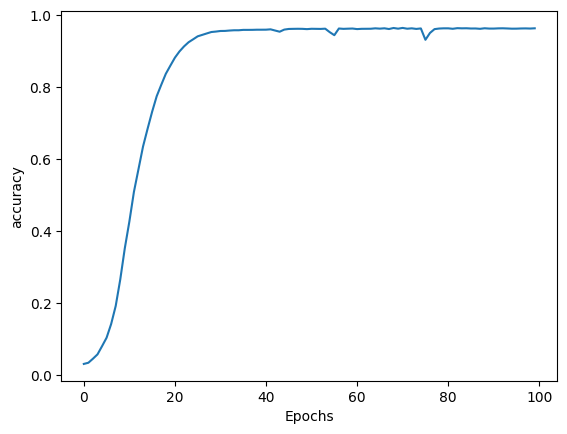

In [10]:
plot_graphs(history, 'accuracy')

In [14]:
seed_text = "إن ما اجتمع  "
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 43ms/step
إن ما اجتمع   من أخبار ابن السراج وما ذكر عنه ليدل دلالة لا جدال فيها أنه عالم حري بالدراسة جدير بالتقييم فهو علم من أعلام النحو، وإمام من أئمة الثقافة وشيخ من شيوخ اللغة من النحاة من أئمة الثقافة وشيخ من شيوخ اللغة نسخة معينة مشيرا إلى صاحب تلك النسخة مبينا أنها بخطه أو كانت ملكه كالمبرد، وثعلب، والقاضي1، فهو يشبه المحقق في هذا الزمن، إذ إنه يحاول إخراج النص سليما، لا يشوبه الغموض، ولا يتطرق إليه الشك من قريب أو بعيد ولكنني لم يطمئنوا على ذلك رجل الأصول مررت قسم مستقل بنفسه يقابل الجملتين الاسمية والفعلية3 ، في آخرها وإذا كانت 334
